#Analysis of Cross Rate & Official Exchange Rate of Danish Krone (DKK)

Cristian Rueda

In [108]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
df = pd.read_csv('/content/drive/MyDrive/202311185338439475971DNVALD18262289903.csv',sep=';')

In [240]:
df.columns = ['Date','DKK_Euro','DKK_US_Dollars','DKK_UK_Pounds_Sterling','DKK_Japanese_Yen']

df['Date'] = df['Date'].str.replace('M','-').str.replace('D','-')

#Replace abnormal values
df['DKK_Euro']                = df['DKK_Euro'].replace('..',None)
df['DKK_US_Dollars']          = df['DKK_US_Dollars'].replace('..',None)
df['DKK_UK_Pounds_Sterling']  = df['DKK_UK_Pounds_Sterling'].replace('..',None)
df['DKK_Japanese_Yen']        = df['DKK_Japanese_Yen'].replace('..',None)

In [241]:
display(df[390:])
df.info()

,Date,DKK_Euro,DKK_US_Dollars,DKK_UK_Pounds_Sterling,DKK_Japanese_Yen
390,2020-04-28,745.7000,685.5800,856.3600,6.4251
391,2020-04-29,745.7100,687.8000,853.4300,6.4552
392,2020-04-30,745.8400,685.7700,858.2200,6.4369
393,2020-05-01,None,None,None,None
394,2020-05-04,746.2200,681.9800,848.9600,6.3867
...,...,...,...,...,...
1279,2023-11-10,745.7700,698.0900,852.9400,4.6101
1280,2023-11-13,745.9800,699.1400,855.9200,4.6060
1281,2023-11-14,745.9700,695.6100,855.1800,4.5858
1282,2023-11-15,745.8800,686.3100,855.4800,4.5650


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    1284 non-null   object
 1   DKK_Euro                1281 non-null   object
 2   DKK_US_Dollars          1281 non-null   object
 3   DKK_UK_Pounds_Sterling  1281 non-null   object
 4   DKK_Japanese_Yen        1281 non-null   object
dtypes: object(5)
memory usage: 50.3+ KB


##**Change of column data type**

In [242]:
df['Date']                    = pd.to_datetime(df['Date'])
df['DKK_Euro']                = df['DKK_Euro'].astype('float')
df['DKK_US_Dollars']          = df['DKK_US_Dollars'].astype('float')
df['DKK_UK_Pounds_Sterling']  = df['DKK_UK_Pounds_Sterling'].astype('float')
df['DKK_Japanese_Yen']        = df['DKK_Japanese_Yen'].astype('float')

The values are divided between 100 because the data downloaded represented the amount of DKK for 100 units of the foreign currency

In [243]:
df[['DKK_Euro','DKK_US_Dollars','DKK_UK_Pounds_Sterling','DKK_Japanese_Yen']] = \
df[['DKK_Euro','DKK_US_Dollars','DKK_UK_Pounds_Sterling','DKK_Japanese_Yen']].div(100,axis=0)

Set the date as Index

In [244]:
df = df.set_index('Date')
display(df)
df.info()

,DKK_Euro,DKK_US_Dollars,DKK_UK_Pounds_Sterling,DKK_Japanese_Yen
Date,,,,
2018-10-01,7.4557,6.4240,8.3699,0.056376
2018-10-02,7.4561,6.4594,8.3736,0.056718
2018-10-03,7.4567,6.4571,8.3882,0.056718
2018-10-04,7.4567,6.4830,8.4180,0.056787
2018-10-05,7.4589,6.4826,8.4602,0.056925
...,...,...,...,...
2023-11-10,7.4577,6.9809,8.5294,0.046101
2023-11-13,7.4598,6.9914,8.5592,0.046060
2023-11-14,7.4597,6.9561,8.5518,0.045858


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1284 entries, 2018-10-01 to 2023-11-16
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DKK_Euro                1281 non-null   float64
 1   DKK_US_Dollars          1281 non-null   float64
 2   DKK_UK_Pounds_Sterling  1281 non-null   float64
 3   DKK_Japanese_Yen        1281 non-null   float64
dtypes: float64(4)
memory usage: 50.2 KB


Replace the nan values with the mean

In [245]:
mean_DKK_Euro                = df['DKK_Euro'].mean()
mean_DKK_US_Dollars          = df['DKK_US_Dollars'].mean()
mean_DKK_UK_Pounds_Sterling  = df['DKK_UK_Pounds_Sterling'].mean()
mean_DKK_Japanese_Yen        = df['DKK_Japanese_Yen'].mean()

df['DKK_Euro'].fillna(value=mean_DKK_Euro , inplace=True)
df['DKK_US_Dollars'].fillna(value=mean_DKK_US_Dollars , inplace=True)
df['DKK_UK_Pounds_Sterling'].fillna(value=mean_DKK_UK_Pounds_Sterling , inplace=True)
df['DKK_Japanese_Yen'].fillna(value=mean_DKK_Japanese_Yen , inplace=True)

<Axes: xlabel='Date'>

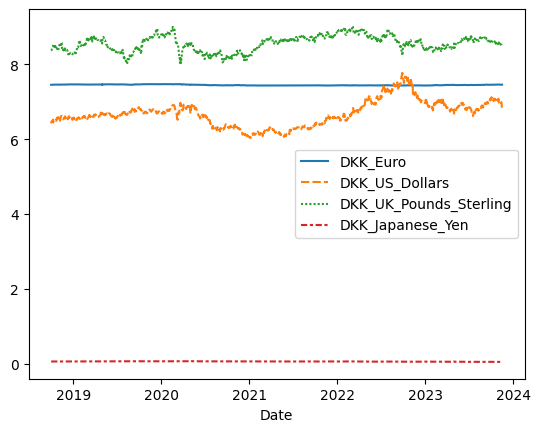

In [246]:
sns.lineplot(data=df)

In this first plot we can see that Euro, Dollar and Pound Sterling have values between 6 and 9 DKK, The Euro having a flat behavior with no variation of value, Dollar and Pound Sterling with higher variation, and the Japanese Yen showing a flat behavior with a value close to Zero

<Axes: >

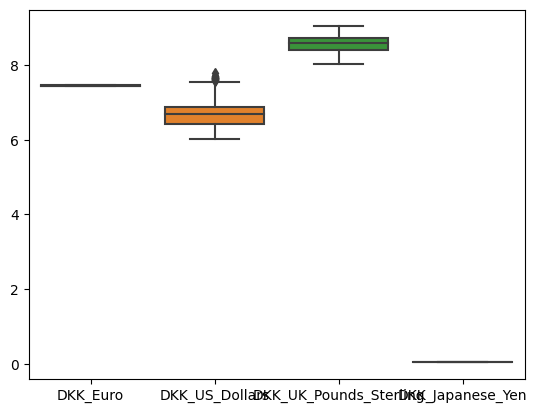

In [247]:
sns.boxplot(data=df)

In the boxplot we see that Euro and Japanese Yen have not variation, Us Dollar has the highest variation with some outliers, and Pound Sterling has the highest mean

(0.0, 0.1)

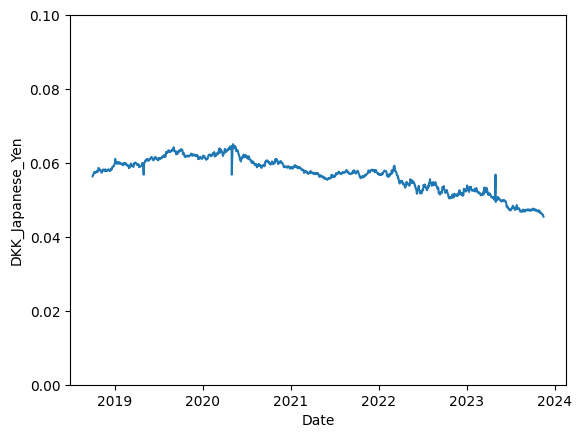

In [248]:
 sns.lineplot(data=df['DKK_Japanese_Yen'])
 plt.ylim(0,0.1)

Decided to plot just the Japanese Yen, having such a low value compare to the others currencies can affect the analysis, in this graph we can see that since 2020 the Japanese Yen seems to have a downward trend

In [249]:
print('Euro  '+str(df['DKK_Euro'].idxmin())+\
      ' '+str(df['DKK_Euro'].min()))
print('US Dollar '+str(df['DKK_US_Dollars'].idxmin())+\
      ' '+str(df['DKK_US_Dollars'].min()))
print('UK Pounds Sterling '+str(df['DKK_UK_Pounds_Sterling'].idxmin())+\
      ' '+str(df['DKK_UK_Pounds_Sterling'].min()))
print('Japanese Yen '+str(df['DKK_Japanese_Yen'].idxmin())+\
      ' '+str(df['DKK_Japanese_Yen'].min()))

Euro  2021-09-20 00:00:00 7.4359
US Dollar 2021-01-06 00:00:00 6.0296
UK Pounds Sterling 2020-03-23 00:00:00 8.035499999999999
Japanese Yen 2023-11-16 00:00:00 0.045469


##**The highest depreciation**

The highest depreciation of Euro against Danish krone was at 2021-09-20 with 7.4359 Danish krones for each Euro

The highest depreciation of US Dollar against Danish krone was at 2021-01-06 with 6.0296 Danish krones for each US Dollar

The highest depreciation of UK Pounds Sterling against Danish krone was at 2020-03-23 with 8.03549 Danish krones for each UK Pounds Sterling

The highest depreciation of Japanese Yen against Danish krone was at 2023-11-16 with 0.045469 Danish krones for each Japanese Yen

In [250]:
print('Euro  '+str(df['DKK_Euro'].idxmax())+\
      ' '+str(df['DKK_Euro'].max()))
print('US Dollar '+str(df['DKK_US_Dollars'].idxmax())+\
      ' '+str(df['DKK_US_Dollars'].max()))
print('UK Pounds Sterling '+str(df['DKK_UK_Pounds_Sterling'].idxmax())+\
      ' '+str(df['DKK_UK_Pounds_Sterling'].max()))
print('Japanese Yen '+str(df['DKK_Japanese_Yen'].idxmax())+\
      ' '+str(df['DKK_Japanese_Yen'].max()))

Euro  2019-11-21 00:00:00 7.4732
US Dollar 2022-09-28 00:00:00 7.775
UK Pounds Sterling 2022-03-04 00:00:00 9.0297
Japanese Yen 2020-05-06 00:00:00 0.065083


##**The highest appreciation**

The highest appreciation of Euro against Danish krone was at 2019-11-21 with 7.4732 Danish krones for each Euro

The highest appreciation of US Dollar against Danish krone was at 2022-09-28 with 7.775 Danish krones for each US Dollar

The highest appreciation of UK Pounds Sterling against Danish krone was at 2022-03-04 with 9.0297 Danish krones for each UK Pounds Sterling

The highest appreciation of Japanese Yen against Danish krone was at 2020-05-06 with 0.065083 Danish krones for each Japanese Yen

##**Calculation of change in Value**

In [251]:
df['change_euro'] = df['DKK_Euro']-df['DKK_Euro'].shift(+1)
df['change_US_Dollars'] = df['DKK_US_Dollars']-df['DKK_US_Dollars'].shift(+1)
df['change_UK_Pounds_Sterling'] = df['DKK_UK_Pounds_Sterling']-df['DKK_UK_Pounds_Sterling'].shift(+1)
df['change_Japanese_Yen'] = df['DKK_Japanese_Yen']-df['DKK_Japanese_Yen'].shift(+1)

df = df[['DKK_Euro',\
         'change_euro',\
         'DKK_US_Dollars',\
         'change_US_Dollars',\
         'DKK_UK_Pounds_Sterling',\
         'change_UK_Pounds_Sterling',\
         'DKK_Japanese_Yen',\
         'change_Japanese_Yen']]
display(df)

,DKK_Euro,change_euro,DKK_US_Dollars,change_US_Dollars,DKK_UK_Pounds_Sterling,change_UK_Pounds_Sterling,DKK_Japanese_Yen,change_Japanese_Yen
Date,,,,,,,,
2018-10-01,7.4557,NaN,6.4240,NaN,8.3699,NaN,0.056376,NaN
2018-10-02,7.4561,0.0004,6.4594,0.0354,8.3736,0.0037,0.056718,0.000342
2018-10-03,7.4567,0.0006,6.4571,-0.0023,8.3882,0.0146,0.056718,0.000000
2018-10-04,7.4567,0.0000,6.4830,0.0259,8.4180,0.0298,0.056787,0.000069
2018-10-05,7.4589,0.0022,6.4826,-0.0004,8.4602,0.0422,0.056925,0.000138
...,...,...,...,...,...,...,...,...
2023-11-10,7.4577,-0.0007,6.9809,0.0046,8.5294,-0.0233,0.046101,-0.000061
2023-11-13,7.4598,0.0021,6.9914,0.0105,8.5592,0.0298,0.046060,-0.000041
2023-11-14,7.4597,-0.0001,6.9561,-0.0353,8.5518,-0.0074,0.045858,-0.000202


In [252]:
print('Euro between '+str(df['change_euro'].shift(-1).idxmin())+\
      ' and '+str(df['change_euro'].idxmin())+\
      ' '+str(df['change_euro'].min()))
print('US Dollar between '+str(df['change_US_Dollars'].shift(-1).idxmin())+\
      ' and '+str(df['change_US_Dollars'].idxmin())+\
      ' '+str(df['change_US_Dollars'].min()))
print('UK Pounds Sterling between '+str(df['change_UK_Pounds_Sterling'].shift(-1).idxmin())+\
      ' and '+str(df['change_UK_Pounds_Sterling'].idxmin())+\
      ' '+str(df['change_UK_Pounds_Sterling'].min()))
print('Japanese Yen between '+str(df['change_Japanese_Yen'].shift(-1).idxmin())+\
      ' and '+str(df['change_Japanese_Yen'].idxmin())+\
      ' '+str(df['change_Japanese_Yen'].min()))

Euro between 2019-04-30 00:00:00 and 2019-05-01 00:00:00 -0.014662919594067958
US Dollar between 2022-11-10 00:00:00 and 2022-11-11 00:00:00 -0.2564000000000002
UK Pounds Sterling between 2020-02-28 00:00:00 and 2020-03-02 00:00:00 -0.17999999999999972
Japanese Yen between 2020-04-30 00:00:00 and 2020-05-01 00:00:00 -0.007536921155347376


##**Extreme fall in the value**

Euro had its highest fall in value between 2019-04-30 and 2019-05-01 diminishing -0.0146

US Dollar had its highest fall in value between 2022-11-10 and 2022-11-11 diminishing -0.2564

UK Pounds had its highest fall in value Sterling between 2020-02-28 and 2020-03-02 diminishing -0.1799

Japanese Yen had its highest fall in value between 2020-04-30 and 2020-05-01 diminishing -0.007536

In [253]:
print('Euro between '+str(df['change_euro'].shift(-1).idxmax())+\
      ' and '+str(df['change_euro'].idxmax())+\
      ' '+str(df['change_euro'].max()))
print('US Dollar between '+str(df['change_US_Dollars'].shift(-1).idxmax())+\
      ' and '+str(df['change_US_Dollars'].idxmax())+\
      ' '+str(df['change_US_Dollars'].max()))
print('UK Pounds Sterling between '+str(df['change_UK_Pounds_Sterling'].shift(-1).idxmax())+\
      ' and '+str(df['change_UK_Pounds_Sterling'].idxmax())+\
      ' '+str(df['change_UK_Pounds_Sterling'].max()))
print('Japanese Yen between '+str(df['change_Japanese_Yen'].shift(-1).idxmax())+\
      ' and '+str(df['change_Japanese_Yen'].idxmax())+\
      ' '+str(df['change_Japanese_Yen'].max()))

Euro between 2019-05-01 00:00:00 and 2019-05-02 00:00:00 0.015562919594066749
US Dollar between 2020-05-01 00:00:00 and 2020-05-04 00:00:00 0.13577517564402886
UK Pounds Sterling between 2019-10-10 00:00:00 and 2019-10-11 00:00:00 0.25
Japanese Yen between 2020-05-01 00:00:00 and 2020-05-04 00:00:00 0.007034921155347387


##**Extreme growth in the value**

Euro had its highest growth in value between 2019-05-01 and 2019-05-02 growing 0.015562

US Dollar had its highest growth in value between 2020-05-01 and 2020-05-04 growing 0.13577

UK Pounds Sterling had its highest growth in value between 2019-10-10 and 2019-10-11 growing 0.25

Japanese Yen had its highest growth in value between 2020-05-01 and 2020-05-04 growing 0.007034